In [6]:
#!/usr/local/bin/python
# coding: latin-1
import os, sys

# cargar librerias-----------------------------------------------
import pandas as pd
from sklearn.datasets import load_wine

# cargar dataset-------------------------------------------------
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
# ver variables predictoras wine---------------------------------
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
# ver variable respuesta-----------------------------------------
wine.value_counts()

alcohol  malic_acid  ash   alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue   od280/od315_of_diluted_wines  proline
14.83    1.64        2.17  14.0               97.0       2.80           2.98        0.29                  1.98             5.20             1.08  2.85                          1045.0     1
12.36    3.83        2.38  21.0               88.0       2.30           0.92        0.50                  1.04             7.65             0.56  1.58                          520.0      1
12.64    1.36        2.02  16.8               100.0      2.02           1.41        0.53                  0.62             5.75             0.98  1.59                          450.0      1
12.60    2.46        2.20  18.5               94.0       1.62           0.66        0.63                  0.94             7.10             0.73  1.58                          695.0      1
         1.34        1.90  18.5               88.0       1.4

In [8]:
from sklearn.tree import DecisionTreeClassifier
# seleccionar todas las variables--------------------------------
X = data.data
# especie de la planta
y = data.target

# crear el objeto de clase arbol---------------------------------
tree_clf = DecisionTreeClassifier(random_state = 3)
# ajustar el arbol-----------------------------------------------
tree_clf.fit(X, y);

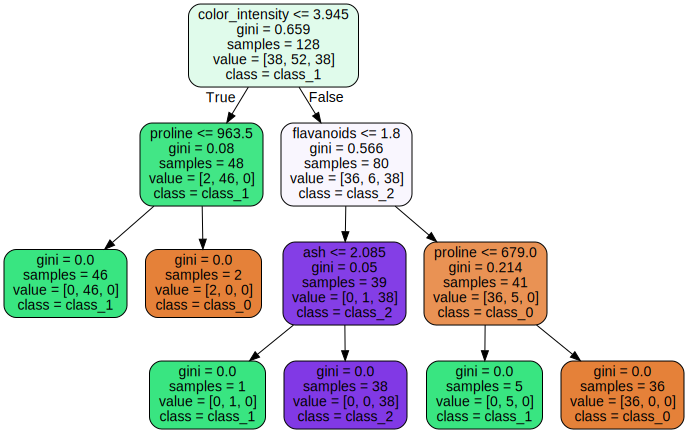

In [26]:
import graphviz 
from graphviz import Source
from sklearn.tree import export_graphviz
# definir donde vamos a guardar la figura------------------------
ROOT_DIR = "."
PATH_FIGURAS = os.path.join(ROOT_DIR, "images")
os.makedirs(PATH_FIGURAS, exist_ok=True)

DotData = export_graphviz(
        tree_clf,
        out_file =None,
        feature_names = data.feature_names,
        class_names = data.target_names,
        rounded = True,
        filled = True
    )
Graph = graphviz.Source(DotData)  
Graph 

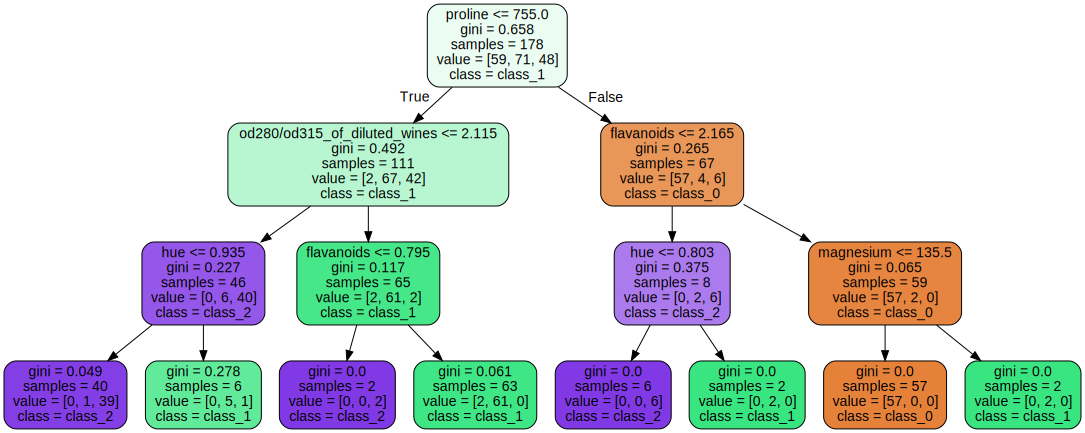

In [27]:
# crear el objeto de clase arbol fijando profundidad maxima a 3--
tree_clf_b = DecisionTreeClassifier(random_state=3, max_depth=3)
# ajustar el arbol-----------------------------------------------
tree_clf_b.fit(X, y);
# generar el .dot------------------------------------------------
DotData = export_graphviz(
        tree_clf_b,
        out_file = None,
        feature_names = data.feature_names,
        class_names = data.target_names,
        rounded = True,
        filled = True
    )
Graph = graphviz.Source(DotData)  
Graph 

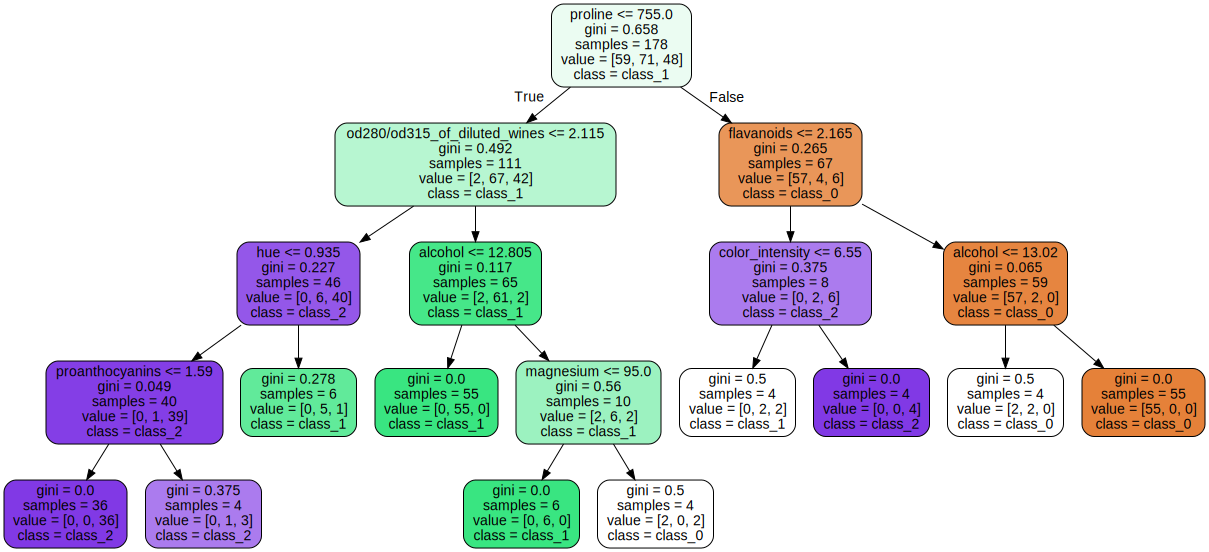

In [28]:
# crear el objeto de clase arbol fijando min_leaf a 4------------
tree_clf_c = DecisionTreeClassifier(random_state=3, 
min_samples_leaf=4)
# ajustar el arbol-----------------------------------------------
tree_clf_c.fit(X, y);
# generar el .dot------------------------------------------------
DotData = export_graphviz(
        tree_clf_c,
        out_file = None,
        feature_names = data.feature_names,
        class_names = data.target_names,
        rounded = True,
        filled = True
    )
Graph = graphviz.Source(DotData)  
Graph 

In [14]:
# cargar numpy---------------------------------------------------
import numpy as np
# definir semilla para que la particion sea la misma-------------
np.random.seed(3)
# definir funcion particiones------------------------------------
def particiones(target, dataset, test_part):
    test_part_size = int(len(dataset) * test_part)
    mezclar_indices = np.random.permutation(len(dataset))
    test_indices = mezclar_indices[:test_part_size]
    train_indices = mezclar_indices[test_part_size:]
    return dataset[train_indices], dataset[test_indices], target[train_indices], target[test_indices]

# usar funcion particiones con test_part 0.281---------------------
X_train, X_test, y_train, y_test = particiones(data.target, 
data.data, 0.281)

In [15]:

# cargar librerias-----------------------------------------------
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# crear objeto de la clase BaggingClassifier---------------------
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), n_estimators = 500,
    max_samples = 75, bootstrap=True, random_state = 3);

# ajustar el modelo----------------------------------------------
bag_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred = bag_clf.predict(X_test)

# comprobar resultados-------------------------------------------
from sklearn.metrics import accuracy_score
print('Bagging',accuracy_score(y_test, y_pred))

# crear objeto de la clase BaggingClassifier---------------------
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), n_estimators = 500,
    max_samples = 75, bootstrap=False, random_state = 3);

# ajustar el modelo----------------------------------------------
pas_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_pas = pas_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print('Pasting',accuracy_score(y_test, y_pred_pas))

Bagging 0.94
Pasting 0.94


In [16]:

# cargar librerias-----------------------------------------------
from sklearn.ensemble import RandomForestClassifier

# crear objeto de la clase RandomForestClassifier----------------
rnd_clf = RandomForestClassifier(n_estimators = 500, 
max_leaf_nodes = 4, random_state = 3, max_samples = 75);

# ajustar el modelo----------------------------------------------
rnd_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_rf = rnd_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print('RandomForest',accuracy_score(y_test, y_pred_rf))

# comparar con los resultados de un arbol de decision------------
tree_clf = DecisionTreeClassifier(random_state = 3, max_depth = 3);
tree_clf.fit(X_train, y_train);
y_pred_tree = tree_clf.predict(X_test);
print('Árbol',accuracy_score(y_test, y_pred_tree))

# cargar librerias-----------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
# crear objeto de la clase BaggingClassifier---------------------
gb_clf = GradientBoostingClassifier(n_estimators = 500,
random_state = 3);

# ajustar el modelo----------------------------------------------
gb_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_gb = gb_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print('Gradient',accuracy_score(y_test, y_pred_gb))

# crear un conjunto de posibles valores--------------------------
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
max_depths = [1, 2, 3, 4]
# inicializamos los vectores de resultados-----------------------
resultados_test = []
# bucle para extraer resultados----------------------------------
for d in max_depths:
  for eta in learning_rates:
   gb_clf_i = GradientBoostingClassifier(learning_rate = eta, 
   n_estimators = 500, random_state = 3, max_depth = d);
   # entrenamos al modelo----------------------------------------
   gb_clf_i.fit(X_train, y_train);
   # prediccion sobre la muestra de validacion-------------------   
   y_pred_test = gb_clf_i.predict(X_test);
   # accuracy de entrenamiento-----------------------------------
   acc_test = accuracy_score(y_test, y_pred_test);
   # guardar resultados en el vector-----------------------------
   resultados_test.append(acc_test);
# resultados_test[0:6] # max_depth = 1
# resultados_test[6:12] # max_depth = 2
# resultados_test[12:18] # max_depth = 3
# resultados_test[18:24] # max_depth = 4
# learning_rates

RandomForest 0.96
Árbol 0.9
Gradient 0.94


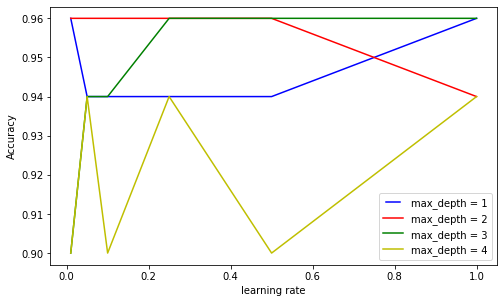

In [17]:
# pintamos los resultados de entrenamiento y validacion----------   
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(8, 4.75))

line1, = plt.plot(learning_rates, resultados_test[0:6], "b",
label = "max_depth = 1")
line2, = plt.plot(learning_rates, resultados_test[6:12], "r",
label = "max_depth = 2")
line2, = plt.plot(learning_rates, resultados_test[12:18], "g",
label = "max_depth = 3")
line2, = plt.plot(learning_rates, resultados_test[18:24], "y",
label = "max_depth = 4")
plt.legend(handler_map={line1: HandlerLine2D(numpoints = 4)})
plt.ylabel("Accuracy")
plt.xlabel("learning rate")
plt.show()